# Tutorial: Simulation

# Part 1: Algebraic Solvers

## Non-linear solver exercises

These exercises are designed to reinforce the concepts covered in Chapter 4, including linear and nonlinear solvers, conditioning, scaling, Jacobians, Hessians, and Newton methods.

### Exercise 1: Computing Jacobians and Hessians Analytically and Numerically
Objective: Practice deriving and approximating Jacobians and Hessians for nonlinear functions.


Start with the scalar function:

$$f(x_1, x_2) = x_1^2 \sin(x_2) + e^{x_1 x_2}$$

1. Use SymPy to compute the analytical Jacobian (gradient) and Hessian at $(x_1, x_2) = (1, \pi/2)$.
2. Approximate the Jacobian and Hessian numerically using finite differences (e.g., with scipy.optimize.approx_fprime for gradient, and a similar approach for Hessian).
3. Compare the results and discuss truncation vs. round-off errors in finite differences.

Hints: For numerical Hessian, finite-difference the gradient. Vary the step size $\epsilon$ (e.g., 1e-6 to 1e-8) to observe error trade-offs.

The code below is a starting point with the symbolic and numerical coded in.



In [2]:
import sympy as sp
from scipy.optimize import approx_fprime
import numpy as np

# Analytical with SymPy
x1, x2 = sp.symbols('x1 x2')
f_analytical = x1**2 * sp.sin(x2) + sp.exp(x1 * x2)

# Numerical function
def f_num(x):
    return x[0]**2 * np.sin(x[1]) + np.exp(x[0] * x[1])

#
print(f"Expected result = [9.5562802  4.81047738]")

Analytical Jacobian: [[9.5562802  4.81047738]]
Numerical Jacobian: [9.55628713 4.81047929]


### Excercise 2: Vector-valued functions

Next, repeat the exercise for the vector function:

$$F(x_1, x_2) = [ x_1^2 \sin(x_2) + e^{x_1 x_2}, x_2^2 \sin(x_1) + e^{x_1 x_2}] $$

In [ ]:
# Analytical with SymPy
x1, x2 = sp.symbols('x1 x2')
f_analytical = [x1**2 * sp.sin(x2) + sp.exp(x1 * x2),
                x2**2 * sp.sin(x1) + sp.exp(x1 * x2)]

# Numerical function
def f_num(x):
    return [x[0]**2 * np.sin(x[1]) + np.exp(x[0] * x[1]),
            x[1]**2 * np.sin(x[0]) + np.exp(x[0] * x[1])]

### Exercise 3: Implementing a Single Gauss-Newton Iteration
#### 3.1) Gradient descent step

The purpose of this exercise is to gain intuition for the Gauss-Newton method through manual implementation and visualization.

For the nonlinear system $\mathbf{F}(\mathbf{x}) = \begin{pmatrix} x_1 + x_2 - 3 \\ x_1^2 + x_2^2 - 5 \end{pmatrix} = \mathbf{0}$:

1. Start from $\mathbf{x}_0 = (1, 1.5)$.
2. Compute the Jacobian $\mathbf{J}(\mathbf{x}_0)$ analytically or numerically.
3. Solve for the search direction $\mathbf{p}$ using the Gauss-Newton normal equations.
4. Update $\mathbf{x}_1 = \mathbf{x}_0 + \mathbf{p}$ and evaluate $\|\mathbf{F}(\mathbf{x}_1)\|$.
5. Visualize the contours of $S(\mathbf{x}) = \frac{1}{2} \|\mathbf{F}(\mathbf{x})\|^2$ and plot the step.

Hints: Use Matplotlib for contour plots. Compare with scipy.optimize.least_squares.

In [ ]:
# Definition of F(x) = 0:
def F(x):
    return np.array([x[0] + x[1] - 3,
                     x[0]**2 + x[1]**2 - 5])

#### 3.2) Improving Gauss-Newton step with line search

The above equation assumed that $\alpha_k = 1$ in the line search:

$$\mathbf{x_{k+1}} = \mathbf{x_k} + \alpha_k \mathbf{p_k}$$

When we have knowledge of the Hessian $f''(x) = \nabla^2 f(x) = H_f(x)\in \mathbb{R}^{d\times d}$, we can obtain the classical Newton step ($iff$ the Hessian is invertible)):

$$x_{k+1} = x_k - [f''(x_k)]^{-1} f'(x_k)$$

An operator that is closely related to the Hessian is the Laplacian operator, defined as the divergence of the gradient of a function. In multiple dimensions, the Laplacian is given by:

$$ \nabla \cdot \nabla  f = \sum_{i=1}^{d} \frac{\partial^2 f}{\partial x_i^2} $$

Because the Laplacian doesn't need to be inverted, it can be used to approximate the Newton step and is more suitable to higher dimensional problems with a large number of entries in the Hessian matrix. Implement the following two steps to improve the Gauss-Newton method:

##### 3.2.1) Pseudo-Newton step

Use the Laplacian operator to approximate value of $\alpha_k$.



##### 3.2.2) Full Newton step

Implement the full matrix multiplication to $H^-1 \nabla f$ to compute the Newton step.

##### 3.2.3) Compare the two methods

Compare the performance of 3.2.1 and 3.2.2 on a contour plot, a good metric for this performance is to measure the reduction in the residual $\|\mathbf{F}(\mathbf{x})\|$ after one iteration.

### 3.3) A full solver

You now have the building blocks to implement a full Gauss-Newton solver. Implement the iterative procedure:
1. Initialize $\mathbf{x}_0$.
2. While not converged:
   - Compute $\mathbf{F}(\mathbf{x}_k)$ and $\mathbf{J}(\mathbf{x}_k)$.
   - Solve for $\mathbf{p}_k$.
   - Perform line search to find $\alpha_k$.
   - Update $\mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k \mathbf{p}_k$.


Choose any of the methods you developed in 3.2 and compare the convergence behavior (number of iterations, final residual) with scipy.optimize.fsolve using the same initial guess.

Below is a skeleton to get you started, but feel free to modify as needed.

In [ ]:
def solve_gauss_newton(F, x0, tol=1e-6, max_iter=100):
    xk = x0
    for k in range(max_iter):
        # Compute F and J
        # Solve for pk
        #
        # Update x_k+1
        xk = xk + alpha_k * pk
        if np.linalg.norm(Fk) < tol:
            break
    return xk

---
## Linear Solver Exercises



## Exercise 4: Analyzing Matrix Conditioning and Scaling

The purpose of this exercise is to understand the impact of matrix conditioning on solution stability and explore scaling techniques to improve numerical accuracy.

Problem: Consider the linear system $\mathbf{Ax} = \mathbf{b}$ where:
$$\mathbf{A} = \begin{pmatrix} 1 & 1 \\ 1 & 1.0001 \end{pmatrix}, \quad \mathbf{b} = \begin{pmatrix} 2 \\ 2.0001 \end{pmatrix}.$$

Compute the condition number of $\mathbf{A}$ using np.linalg.cond.
Solve for $\mathbf{x}$ and perturb $\mathbf{b}$ by a small amount (e.g., add 0.001 to each element). Observe the change in $\mathbf{x}$.
Scale the rows of $\mathbf{A}$ and $\mathbf{b}$ to have unit norm (e.g., divide each row by its Euclidean norm) and repeat the process. Compare the condition numbers and solution sensitivities.

Hints: Use np.linalg.solve for solving. Discuss why scaling helps in ill-conditioned systems.

In [3]:
import numpy as np

# Define A and b
A = np.array([[1, 1], [1, 1.0001]])
b = np.array([2, 2.0001])

# Compute condition number
cond = np.linalg.cond(A)
print(f"Condition number: {cond}")

# Solve original system
x = np.linalg.solve(A, b)

# Perturb b and solve again
b_perturbed = b + 0.001
x_perturbed = np.linalg.solve(A, b_perturbed)
print(f"Relative change in x: {np.linalg.norm(x - x_perturbed) / np.linalg.norm(x)}")

# Scaling: Normalize rows
row_norms = np.linalg.norm(A, axis=1)
A_scaled = A / row_norms[:, np.newaxis]
b_scaled = b / row_norms

# Repeat condition and solves...

Condition number: 40002.000074915224
Relative change in x: 0.0007071067811864696


## Excercise 6: Implementing and Comparing Gaussian Elimination vs. LU Decomposition

In the excercise we want to demonstrate the relationship between Gaussian elimination (which you might remember from undergrad linear algebra classes) and LU decomposition, implement both from scratch, and compare their efficiency and stability for solving linear systems.

Consider the linear system $\mathbf{Ax} = \mathbf{b}$ with:

$$\mathbf{A} = \begin{pmatrix} 2 & 1 & 1 \\ 4 & -6 & 0 \\ -2 & 7 & 2 \end{pmatrix}, \quad \mathbf{b} = \begin{pmatrix} 5 \\ -2 \\ 9 \end{pmatrix}.$$

1.Implement Gaussian elimination without pivoting to solve for $\mathbf{x}$. Track the elimination steps and compute the effective upper triangular matrix.
2. Implement LU decomposition without pivoting (i.e., factor $\mathbf{A} = \mathbf{LU}$, where $\mathbf{L}$ has 1s on the diagonal).
3. Solve the system using the LU factors (forward substitution for $\mathbf{Ly} = \mathbf{b}$, then back substitution for $\mathbf{Ux} = \mathbf{y}$).
4. Compare the results from both methods. Then, test with multiple $\mathbf{b}$ vectors (e.g., add $\mathbf{b}_2 = [1, 2, 3]^\top$) and measure computation time using %timeit in Jupyter.
5. Introduce a small perturbation to $\mathbf{A}$ (e.g., add 1e-10 to one element) and discuss stability differences. Optionally, add partial pivoting to both implementations and recompare.

Hints:

1. In Gaussian elimination, augment $\mathbf{A}$ with $\mathbf{b}$ and perform row operations.
1. For LU, store multipliers in $\mathbf{L}$ below the diagonal during elimination.
1. Use NumPy for array operations but avoid built-in solvers like np.linalg.solve—implement the algorithms manually for learning.
1. Reference SciPy's scipy.linalg.lu_factor for validation, but explain why it's more robust.

Both methods should yield $\mathbf{x} \approx [1, 2, 2]^\top$. LU is more efficient for multiple $\mathbf{b}$ since factorization is done once. Without pivoting, both can fail on singular/ill-conditioned matrices—discuss how partial pivoting (e.g., swapping rows) improves stability, mirroring real-world implementations like `scipy.linalg.lu`.

The full algorithms are provided below to get you started:

#### Gaussian Elimination Algorithm
Gaussian elimination transforms the augmented matrix $[\mathbf{A} | \mathbf{b}]$ into row echelon form (upper triangular) through row operations, then solves via back substitution. For a system $\mathbf{Ax} = \mathbf{b}$ where $\mathbf{A} \in \mathbb{R}^{n \times n}$, the algorithm proceeds as follows (without pivoting for simplicity):

1. Forward Elimination Phase:
1.1 For each pivot row $k = 1$ to $n-1$:
For each row $i = k+1$ to $n$:
Compute the multiplier: $m_{ik} = \frac{a_{ik}}{a_{kk}}$
Update row $i$: $a_{ij} \leftarrow a_{ij} - m_{ik} a_{kj}$ for $j = k$ to $n$
Update right-hand side: $b_i \leftarrow b_i - m_{ik} b_k$

This results in an upper triangular matrix $\mathbf{U}$ and updated $\mathbf{b}'$.Symbolically, the elimination step for element $a_{ij}$ (with $i > k, j \geq k$) is:$$a_{ij}^{(k)} = a_{ij}^{(k-1)} - \frac{a_{ik}^{(k-1)}}{a_{kk}^{(k-1)}} a_{kj}^{(k-1)}$$where superscript $(k)$ denotes after the $k$-th elimination step.
1.2 Back Substitution Phase:
Starting from the last equation:$$x_n = \frac{b_n'}{u_{nn}}$$Then for $i = n-1$ down to $1$:$$x_i = \frac{b_i' - \sum_{j=i+1}^n u_{ij} x_j}{u_{ii}}$$

This method has a time complexity of $O(n^3)$ due to the nested loops in elimination.

2. LU Decomposition Algorithm
LU decomposition factors $\mathbf{A}$ into a lower triangular matrix $\mathbf{L}$ (with 1s on the diagonal) and an upper triangular matrix $\mathbf{U}$, such that $\mathbf{A} = \mathbf{LU}$. This is equivalent to Gaussian elimination but stores the multipliers in $\mathbf{L}$. For solving $\mathbf{Ax} = \mathbf{b}$, first solve $\mathbf{Ly} = \mathbf{b}$ (forward substitution), then $\mathbf{Ux} = \mathbf{y}$ (back substitution).

2.1 Factorization Phase (Doolittle's Algorithm, without pivoting):
Initialize $\mathbf{L} = \mathbf{I}$ (identity) and $\mathbf{U} = \mathbf{A}$.For each column $k = 1$ to $n$:
For the upper part ($j = k$ to $n$): $u_{kj} = a_{kj}$ (already set)
For the multipliers ($i = k+1$ to $n$):
$$l_{ik} = \frac{u_{ik}}{u_{kk}}, \quad u_{ij} \leftarrow u_{ij} - l_{ik} u_{kj} \quad \forall j \geq k$$
More formally, for $k = 1$ to $n$:$$u_{kk} = a_{kk} - \sum_{m=1}^{k-1} l_{km} u_{mk}$$For $j = k+1$ to $n$:$$u_{kj} = a_{kj} - \sum_{m=1}^{k-1} l_{km} u_{mj}$$For $i = k+1$ to $n$:$$l_{ik} = \frac{1}{u_{kk}} \left( a_{ik} - \sum_{m=1}^{k-1} l_{im} u_{mk} \right)$$
2.2 Forward Substitution ($\mathbf{Ly} = \mathbf{b}$):$$y_1 = \frac{b_1}{l_{11}} = b_1 \quad (\text{since } l_{11} = 1)$$For $i = 2$ to $n$:$$y_i = b_i - \sum_{j=1}^{i-1} l_{ij} y_j$$
2.3 Back Substitution ($\mathbf{Ux} = \mathbf{y}$):
Identical to Gaussian elimination's back substitution phase.

LU decomposition also has $O(n^3)$ complexity for factorization but allows efficient reuse for multiple $\mathbf{b}$ vectors (each solve is $O(n^2)$).
Note on Pivoting: In practice, partial pivoting is added to both methods for numerical stability, swapping rows to select the largest pivot and avoid division by small numbers. This modifies the algorithms to produce $\mathbf{PA} = \mathbf{LU}$ where $\mathbf{P}$ is a permutation matrix.

### Exercise 7: Comparing Direct Linear Solvers (LU vs. SVD)
In this exertcise we evaluate stability and performance of direct solvers for ill-conditioned systems.
Problem: Generate a Hilbert matrix $\mathbf{H}_n$ (ill-conditioned) of size $n=10$:
$$H_{ij} = \frac{1}{i + j - 1}$$

Solve $\mathbf{Hx} = \mathbf{b}$ (let $\mathbf{b} = \mathbf{H} \cdot \mathbf{1}$, true $\mathbf{x} = \mathbf{1}$) using LU decomposition (scipy.linalg.lu_solve) and SVD (np.linalg.pinv).
Perturb $\mathbf{b}$ slightly and compare recovered $\mathbf{x}$ errors.
Measure computation time for increasing $n$.

Hints: Use scipy.linalg.lu_factor for LU. SVD is more robust for rank-deficient cases.

### Exercise 8: Implementing and Testing Gauss-Seidel Iteration

Objective: Implement an iterative solver and analyze convergence conditions.
Problem: Solve the system from the chapter example:
$$\mathbf{A} = \begin{pmatrix} 4 & -1 & 0 \\ -1 & 4 & -1 \\ 0 & -1 & 4 \end{pmatrix}, \quad \mathbf{b} = \begin{pmatrix} 2 \\ 3 \\ 2 \end{pmatrix}.$$

Implement Gauss-Seidel with a tolerance of 1e-6 and max 100 iterations.
Test on a non-diagonally dominant matrix (e.g., swap rows) and observe divergence.
Add SOR with $\omega = 1.2$ and compare iteration counts.

Hints: Check diagonal dominance: $|a_{ii}| \geq \sum_{j \neq i} |a_{ij}|$.

# Part 2: ODE/DAE integrators

## Exercise 1: Forward Euler for a Simple Orbital Decay Model (Basic ODE)
### 1.1 Forward Euler simulation
Simulate the altitude decay of a low-Earth orbit satellite due to atmospheric drag using the scalar ODE $\frac{dh}{dt} = -k h^2$ (simplified drag model), where $h(t)$ is altitude, $k = 10^{-6}$ km⁻¹ s⁻¹ is a drag coefficient. Initial condition: $h(0) = 400$ km. Integrate over $t \in [0, 10^6]$ s. Implement forward Euler; explore step size effects on accuracy/stability. Compare to analytical solution $h(t) = \frac{h_0}{1 + k h_0 t}$.

### 1.2 Error analysis and stability
Implement an error function ($e.g. ||h_numerical - h_analytical||$) Try much larger dt values and comment on stability.

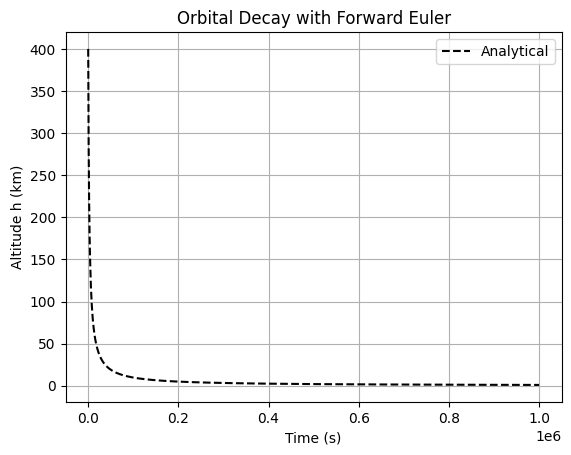

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
h0 = 400.0  # km
k = 1e-6    # km^-1 s^-1
t_f = 1e6   # s
dt = 1e1  # Note: higher values can result in overflow errors

#TODO: Implement:
# The ODE function dh/dt
def dhdt(t, h, k):
    pass
# Data containers to save numerical solution e.g. t_num = [], h_num = []:

# A forward Euler integration loop (while or for loop)


# Analytical solution for comparison
t_anal = np.linspace(0, t_f, 1000)
h_anal = h0 / (1 + k * h0 * t_anal)

# Plot
#plt.plot(t_num, h_num, label='Forward Euler')
plt.plot(t_anal, h_anal, 'k--', label='Analytical')
plt.xlabel('Time (s)')
plt.ylabel('Altitude h (km)')
plt.title('Orbital Decay with Forward Euler')
plt.legend()
plt.grid()
plt.show()

# TODO: Compute max error; test dt = 1e3, 1e5; discuss stability.

## Exercise 2: Implicit Euler for a Stiff Reaction Control System (Stiffness)
### 2.1 Implicit Euler simulation
Model a spacecraft's reaction wheel desaturation using thrusters: $\frac{d\omega}{dt} = -50 \omega + u(t)$, where $\omega$ is wheel speed (stiff due to fast torque response), $u(t)$ is control input (e.g., step function). Initial $\omega(0) = 10$. Integrate over $t \in [0, 1]$ with $u(t) = 1$ for $t < 0.2$, else 0. Implement implicit Euler with fsolve; demonstrate stability for large dt where forward Euler fails.

### 2.2 Stability analysis
Analyze eigenvalues for stiffness.

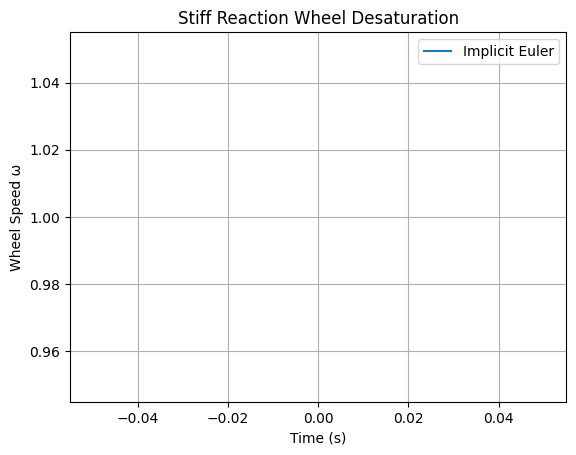

In [19]:
from scipy.optimize import fsolve

# ODE: dω/dt = -50 ω + u(t)
def u(t):
    return 10 if t < 0.2 else 0

def dωdt(t, ω):
    return -50 * ω + u(t)

# Implicit Euler loop (dt=0.05, unstable for forward)
ω = 1.0
t = 0.0
t_f = 1.0
dt = 0.005  # Play with lower values
t_values = [t]
ω_values = [ω]
while t < t_f:
    pass
    t += dt
    # Implement implicit Euler step using fsolve

# Plot (add forward Euler for comparison, expect oscillations)
plt.plot(t_values, ω_values, label='Implicit Euler')
plt.xlabel('Time (s)')
plt.ylabel('Wheel Speed ω')
plt.title('Stiff Reaction Wheel Desaturation')
plt.legend()
plt.grid()
plt.show()

# TODO: Compute Jacobian eigenvalue; test dt=0.1.

##  Problem 3: Runge-Kutta vs. LSODA for Variable-Stiffness Attitude Dynamics (Advanced Solvers)

Simulate a spacecraft's pitch angle $\theta$ with variable damping:
$$\frac{d^2\theta}{dt^2} + b(t)$$

$$\frac{d\theta}{dt} + k \theta = 0,$$

recast as first-order system. $b(t) = 1 + 50 \sin(2\pi t)$ (time-varying stiffness).

Initial conditions: $\theta(0)=1$, $\dot{\theta}(0)=0$.

Integrate over $t \in [0, 10]$ using both RK45 and LSODA from scipy.integrate.solve_ivp, then compare the number of steps taken by each solver (e.g. print len(sol_rk.t) vs len(sol_lsoda.t); discuss switching.

/tmp/ipykernel_108713/380503153.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


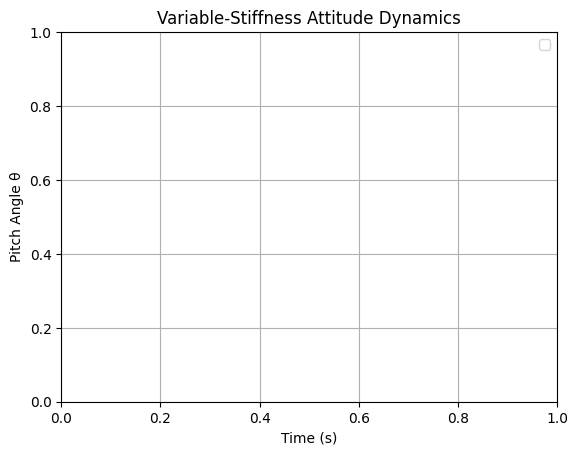

In [25]:
from scipy.integrate import solve_ivp

t_range = [0, 10]
y0 = [1.0, 0.0]

def b(t):
    return 1 + 50 * np.sin(2 * np.pi * t)

def dydt(t, y):
    #TODO:
    return



# Solve with using solve_ivp with `method=RK45` and `method=LSODA` e.g. sol_rk = solve_ivp(ode, t_range, y0, method='RK45')
sol_rk = None
sol_lsoda = None

# Plot θ
#plt.plot(sol_rk.t, sol_rk.y[0], label='RK45')
#plt.plot(sol_lsoda.t, sol_lsoda.y[0], '--', label='LSODA')
plt.xlabel('Time (s)')
plt.ylabel('Pitch Angle θ')
plt.title('Variable-Stiffness Attitude Dynamics')
plt.legend()
plt.grid()
plt.show()

# Tasks: Print len(sol_rk.t) vs len(sol_lsoda.t); discuss switching.

## Problem 4: Index-1 DAE for Constrained Satellite Motion (DAEs)
Model a tethered satellite system as index-1 DAE:

$$\frac{dy_1}{dt} = v(t),$$
$$\frac{dy_2}{dt} = -\frac{g y_2}{L},$$
$$0 = y_1^2 + y_2^2 - L^2~(constraint)$$
$$ v(t) = 50 \sin(2 \pi t) + 1$$

where $L=100$ m, $g=9.81$ m/s². Initial: $y_1(0)=0$, $y_2(0)=L$.
Objectives: Implement using solve_ivp on reduced ODE (solve constraint for y); compare to full DAE solve with mass matrix.

/tmp/ipykernel_108713/1782078935.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


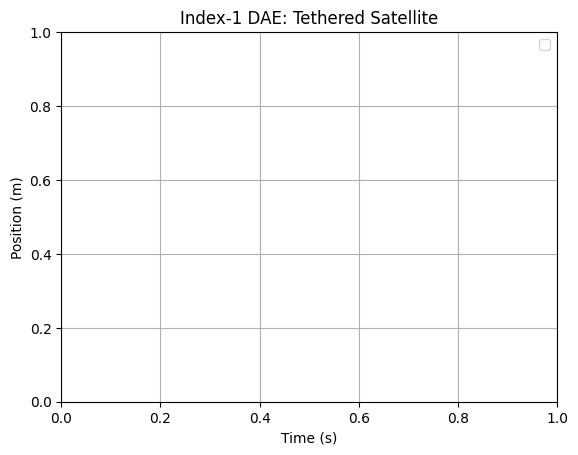

In [32]:
# Reduced ODE after solving constraint for y = sqrt(L^2 - x^2)
import numpy as np

# Parameters
L = 100.0  # m
g = 9.81  # m/s^2

# Implement DAE system solving for dydt:


#sol = solve_ivp(dydt, [0, 10], [0, 1], method='LSODA')

# Plot y_1(t), y_1(t)
#plt.plot(sol.t, sol.y[0], label='y_1(t)')
#plt.plot(sol.t, np.sqrt(100**2 - sol.y[0]**2), label='y2(t)')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Index-1 DAE: Tethered Satellite')
plt.legend()
plt.grid()
plt.show()

# Tasks: Implement full DAE with mass matrix in solve_ivp; check constraint violation.

## (Optional) Problem 5: Symplectic Integrator for Long-Term Orbital Stability (Expanded)

In this exercise we will use the Verlet (leapfrog) integrator to simulate an unperturbed two-body orbit (circular) over 100 orbital periods. For simplicity, use the 2D restricted two-body problem for a satellite around Earth: position $\mathbf{q} = (x, y)$, momentum $\mathbf{p} = (v_x, v_y)$ (unit mass), with equations $\dot{\mathbf{q}} = \mathbf{p}$, $\dot{\mathbf{p}} = -\frac{\mu}{r^3} \mathbf{q}$, where $r = \|\mathbf{q}\|$ and $\mu = 3.986 \times 10^{14}$ m³/s² (Earth). Initial conditions for circular Low Earth Orbit (LEO) at radius $r_0 = 6771$ km: $x(0) = r_0$, $y(0) = 0$, $v_x(0) = 0$, $v_y(0) = \sqrt{\mu / r_0}$.
This is a Hamiltonian system, periodic with constant energy $E = \frac{1}{2} \|\mathbf{p}\|^2 - \frac{\mu}{r}$. We expect no decay in the orbit radius or energy over time.

The simulation below shows the implementation of three integrators: Forward Euler, Backward Euler (implicit), and Verlet. We then compare their orbital paths and energy conservation over 100 orbital periods. In this exercise we want to gain insight into the difference between physical and numerical stability. In particular, we expect the symplectic Verlet integrator to conserve energy much better over long times compared to the non-symplectic Euler methods. We expect the Forward Euler to gain energy (orbit spirals out) and Backward Euler to lose energy (orbit spirals in). It's important to think about why this is the case in terms of the numerical properties of the integrators.

/tmp/ipykernel_108713/3248866219.py:49: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  return fsolve(res, y)
/tmp/ipykernel_108713/3248866219.py:49: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  return fsolve(res, y)


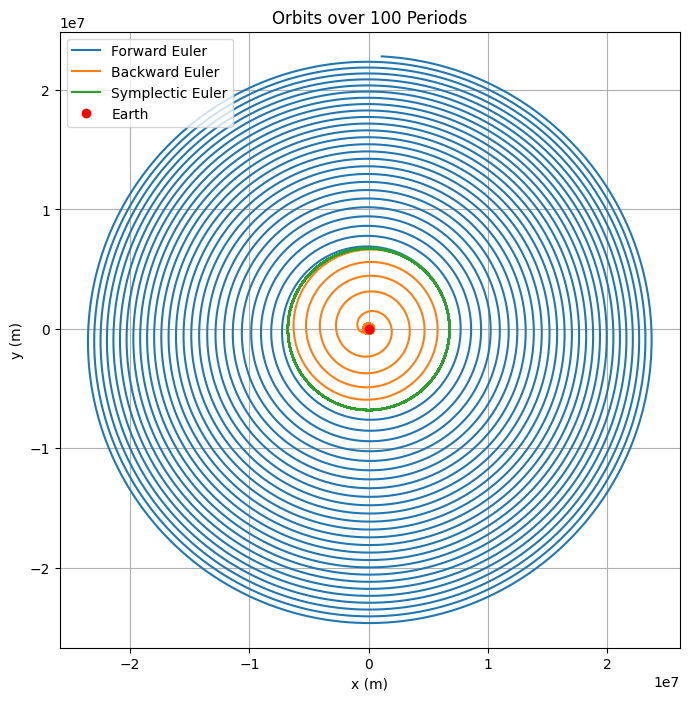

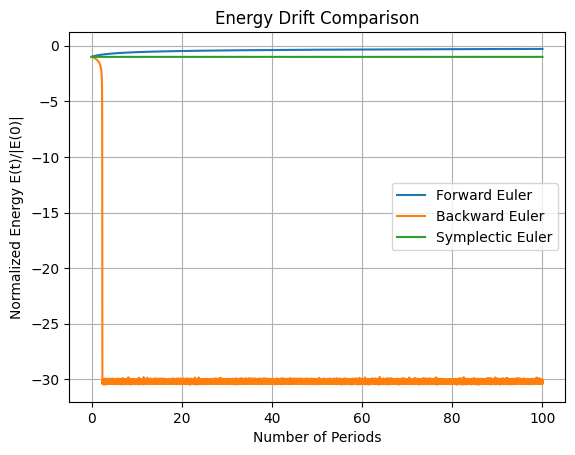

In [62]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Parameters
mu = 3.986e14  # m^3/s^2
r0 = 6771000.0  # m (LEO)
v0 = np.sqrt(mu / r0)
T = 2 * np.pi * np.sqrt(r0**3 / mu)  # Orbital period ~5500 s
t_f = 100 * T  # 100 periods
dt = 10.0  # s

# Initial state y = [x, y, vx, vy]
y0 = np.array([r0, 0.0, 0.0, v0])

# ODE function f(y, mu) = dy/dt = [vx, vy, -mu x / r^3, -mu y / r^3]
def dydt(y, mu):
    x, y_pos, vx, vy = y
    r = np.sqrt(x**2 + y_pos**2)
    ax = -mu * x / r**3
    ay = -mu * y_pos / r**3
    return np.array([vx, vy, ax, ay])

# Data storage function
def simulate(integrator, label):
    t = 0.0
    y = y0.copy()
    t_values = [t]
    y_values = [y.copy()]
    E_values = [0.5 * (y[2]**2 + y[3]**2) - mu / np.linalg.norm(y[:2])]  # Initial E
    while t < t_f:
        y = integrator(y, dt, mu)
        t += dt
        y_values.append(y.copy())
        t_values.append(t)
        r = np.linalg.norm(y[:2])
        E = 0.5 * (y[2]**2 + y[3]**2) - mu / r
        E_values.append(E)
    return np.array(t_values), np.array(y_values), np.array(E_values)

# Forward Euler
def forward_euler(y, dt, mu):
    return y + dt * dydt(y, mu)

# Backward Euler (implicit)
def backward_euler(y, dt, mu):
    def res(y_next):
        return y_next - y - dt * dydt(y_next, mu)
    return fsolve(res, y)

# Symplectic Euler (momentum-first: update p using current q, then q using new p)
def symplectic_euler(y, dt, mu):
    accel = dydt(y, mu)[2:]  # Acceleration from current state (depends on q)
    p_new = y[2:] + dt * accel
    q_new = y[:2] + dt * p_new
    return np.concatenate([q_new, p_new])

# Simulate all
t_fwd, y_fwd, E_fwd = simulate(forward_euler, 'Forward Euler')
t_bwd, y_bwd, E_bwd = simulate(backward_euler, 'Backward Euler')
t_sym, y_sym, E_sym = simulate(symplectic_euler, 'Symplectic Euler')

# Plot orbits
plt.figure(figsize=(8, 8))
plt.plot(y_fwd[:, 0], y_fwd[:, 1], label='Forward Euler')
plt.plot(y_bwd[:, 0], y_bwd[:, 1], label='Backward Euler')
plt.plot(y_sym[:, 0], y_sym[:, 1], label='Symplectic Euler')
plt.plot(0, 0, 'ro', label='Earth')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Orbits over 100 Periods')
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()

# Plot energy
plt.figure()
plt.plot(t_fwd / T, E_fwd / abs(E_fwd[0]), label='Forward Euler')  # Normalized
plt.plot(t_bwd / T, E_bwd / abs(E_bwd[0]), label='Backward Euler')
plt.plot(t_sym / T, E_sym / abs(E_sym[0]), label='Symplectic Euler')
plt.xlabel('Number of Periods')
plt.ylabel('Normalized Energy E(t)/|E(0)|')
plt.title('Energy Drift Comparison')
plt.legend()
plt.grid()
plt.show()


Tasks:

### 5.1  Analysis of Jacobian and Eigenvalues

Compute the Jacobian matrix $\mathbf{J} = \frac{\partial \mathbf{f}}{\partial \mathbf{y}}$ for the state vector $\mathbf{y} = [x, y, v_x, v_y]^\top$, where $\mathbf{f}(\mathbf{y}) = [v_x, v_y, -\mu x / r^3, -\mu y / r^3]^\top$. Evaluate it symbolically or numerically at a point on the circular orbit (e.g., initial condition). Compute eigenvalues to classify the fixed point (origin) or orbital stability: expect pure imaginary eigenvalues indicating a center (elliptic fixed point in linearized sense, leading to periodic motion without decay).

### 5.2  Implementing and Comparing Integrators
In the above code we have implement forward Euler, backward (implicit) Euler, and Verlet integrators. Simulate over 100 orbital periods ($T \approx 2\pi \sqrt{r_0^3 / \mu} \approx 5500$ s, so $t_f = 100 T \approx 5.5 \times 10^5$ s). The first plot shows the position of the orbits over time, the second plot is the total energy $E(t)$ for each method over time. Discuss why forward and backward Euler show artificial decay (numerical dissipation), while Verlet preserves energy with bounded oscillations (no long-term drift).

Additionally, experiment with different time step sizes (e.g., dt = 1 s, 10 s, 100 s) and observe how the energy conservation and orbit stability change for each integrator. Discuss the trade-offs between accuracy, stability, and computational cost for each method in the context of long-term orbital simulations.


### 5.3 Non-conservative systems

What would happen if you added a small perturbation to the force function to simulate a non-conservative effect (e.g., atmospheric drag)? Modify the force function to include a small constant term (e.g., add a small `- 1e-2` friction to the force function in the x or y directions) and rerun the simulation. Discuss how each integrator behaves in this non-conservative scenario, particularly focusing on energy dissipation and orbit decay. Compare only the symplectic integrator for clarity.



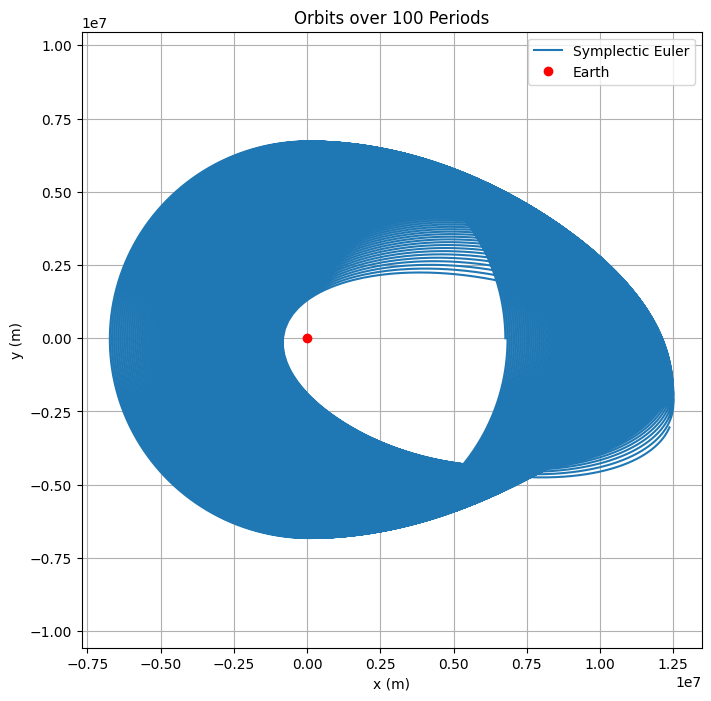

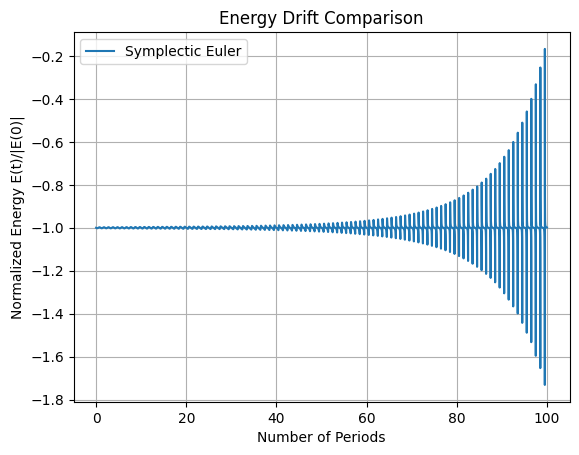

In [66]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Parameters
mu = 3.986e14  # m^3/s^2
r0 = 6771000.0  # m (LEO)
v0 = np.sqrt(mu / r0)
T = 2 * np.pi * np.sqrt(r0**3 / mu)  # Orbital period ~5500 s
t_f = 100 * T  # 100 periods
dt = 10.0  # s

# Initial state y = [x, y, vx, vy]
y0 = np.array([r0, 0.0, 0.0, v0])

# ODE function f(y, mu) = dy/dt = [vx, vy, -mu x / r^3, -mu y / r^3]
def dydt(y, mu):
    x, y_pos, vx, vy = y
    r = np.sqrt(x**2 + y_pos**2)
    ax = -mu * x / r**3
    ay = -mu * y_pos / r**3 - 1e-2
    return np.array([vx, vy, ax, ay])

# Data storage function
def simulate(integrator, label):
    t = 0.0
    y = y0.copy()
    t_values = [t]
    y_values = [y.copy()]
    E_values = [0.5 * (y[2]**2 + y[3]**2) - mu / np.linalg.norm(y[:2])]  # Initial E
    while t < t_f:
        y = integrator(y, dt, mu)
        t += dt
        y_values.append(y.copy())
        t_values.append(t)
        r = np.linalg.norm(y[:2])
        E = 0.5 * (y[2]**2 + y[3]**2) - mu / r
        E_values.append(E)
    return np.array(t_values), np.array(y_values), np.array(E_values)

# Forward Euler
def forward_euler(y, dt, mu):
    return y + dt * dydt(y, mu)

# Backward Euler (implicit)
def backward_euler(y, dt, mu):
    def res(y_next):
        return y_next - y - dt * dydt(y_next, mu)
    return fsolve(res, y)

# Symplectic Euler (momentum-first: update p using current q, then q using new p)
def symplectic_euler(y, dt, mu):
    accel = dydt(y, mu)[2:]  # Acceleration from current state (depends on q)
    p_new = y[2:] + dt * accel
    q_new = y[:2] + dt * p_new
    return np.concatenate([q_new, p_new])

# Simulate all
t_fwd, y_fwd, E_fwd = simulate(forward_euler, 'Forward Euler')
##t_bwd, y_bwd, E_bwd = simulate(backward_euler, 'Backward Euler')
t_sym, y_sym, E_sym = simulate(symplectic_euler, 'Symplectic Euler')

# Plot orbits
plt.figure(figsize=(8, 8))
plt.plot(y_sym[:, 0], y_sym[:, 1], label='Symplectic Euler')
plt.plot(0, 0, 'ro', label='Earth')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Orbits over 100 Periods')
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()

# Plot energy
plt.figure()
plt.plot(t_sym / T, E_sym / abs(E_sym[0]), label='Symplectic Euler')
plt.xlabel('Number of Periods')
plt.ylabel('Normalized Energy E(t)/|E(0)|')
plt.title('Energy Drift Comparison')
plt.legend()
plt.grid()
plt.show()